In [1]:
#Setting up prerequisites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import matrix

print("Setup Complete\n")

Setup Complete



In [2]:
class MF():

    def __init__(self, R, K, alpha, beta, iterations,R_base):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.

        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """

        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.R_base=R_base

    def train(self):
        # Create and initialize P and Q matrices with random values
        
        self.P = np.random.normal(scale=1.0/self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1.0/self.K, size=(self.num_items, self.K))
        
        
        """
        np.random.normal return the array of specified size by allocating random values according to the Gaussian (Normal) 
        distribution with (mean = loc , SD = scale). By default mean=0.
        
        Helpful link : https://www.geeksforgeeks.org/rand-vs-normal-numpy-random-python/
        
        """

        
        #(np.where(self.R != 0)) -> returns two lists M,N where Mi,Ni are row and coulmn of non-zero elements.

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R_base[i, j] > 0
        ]

        # Perform stochastic gradient descent for number of iterations
        training_process = []
        mse=0.0
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            x=self.sgd()
            mse1=mse
            mse = self.mse()
            if i!=0 and mse > mse1+3:
                print("optimality reached at Iteration : %d" % (i))
                break
            training_process.append((i, mse))
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R_base.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        e=0.0
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e1=e
            e = (r - prediction)
            

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (2* e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (2 * e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return self.P.dot(self.Q.T)

In [3]:
class Stack:
     def __init__(self,items):
         self.items = items

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)

In [4]:
### Using Movielens 100K dataset for the training and testing ##

dataFile=r"D:\Academics\7th sem\Data sciences\Project\ml-100k\u.data"
colNames=['UserID','MovieID','Rating','TimeStamp']
data=pd.read_csv(dataFile,sep="\t",names=colNames,header=None)
data.head()
#data.shape[0]

,UserID,MovieID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
###  Dropping timestamp as its unnecessary in this context  ###
data = data.drop(data.columns[[3]], axis=1)
data.head()

,UserID,MovieID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [6]:
"""
Converting the ratings to matrix form such that



"""
mat=data.pivot(*data.columns)
R=np.asarray(mat)
print(R[:10,:10]) 

[[ 5.  3.  4.  3.  3.  5.  4.  1.  5.  3.]
 [ 4. nan nan nan nan nan nan nan nan  2.]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [ 4.  3. nan nan nan nan nan nan nan nan]
 [ 4. nan nan nan nan nan  2.  4.  4. nan]
 [nan nan nan  5. nan nan  5.  5.  5.  4.]
 [nan nan nan nan nan nan  3. nan nan nan]
 [nan nan nan nan nan  5.  4. nan nan nan]
 [ 4. nan nan  4. nan nan  4. nan  4. nan]]


In [7]:
"""
Since some of the users may not rate some movies, we have nan values after converting to matrix form
We convert all those nan values to 0

"""

R=np.nan_to_num(R)
#[:200,:200]
R=np.float64(R) #for calculation purpose
R1=R
R[:10,:10]

array([[5., 3., 4., 3., 3., 5., 4., 1., 5., 3.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 2., 4., 4., 0.],
       [0., 0., 0., 5., 0., 0., 5., 5., 5., 4.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 4., 0., 0., 0.],
       [4., 0., 0., 4., 0., 0., 4., 0., 4., 0.]])

In [9]:
MAE_normalMF=[]
MAE_DeepMF=[]


for observations in range(10):
    print("######################## Iteration-%d ###########"% (observations+1))
    print()
    print("################# MF ######################") 
    stackFactors1=Stack([10])
    stackIterations1=Stack([200])
    stackLearnRate1=Stack([0.01])
    stackRegularions1=Stack([0.01])
    """
    We try to analyze the efficiency(based on MAE) of base Matrix Factorization and Deep Matrix Factorization 
    with the same training and testing sets. For that we try to divide the dataset into 70:30
    ratios for training and testing respectively.We divide randomly and then make those values 0's and then try
    to find these values based on training dataset.

    """
    prop_i = int(min(R.shape[0],R.shape[1])*0.3)
    prop_j = int(R.shape[1] * 0.2)
    #print(R.size)
    R1=R
    R1=np.rint(R1)

    #Randomly choose indices of the numpy array:
    i = [np.random.choice(range(R.shape[0])) for _ in range(prop_i)]
    j = [np.random.choice(range(R.shape[1])) for _ in range(prop_i)]

    R1[i,j]=0

    #print(len(i))
    #print(len(j))


    print("Original:\n",R)
    print("Test Set:\n",R1)
    R=np.rint(R)
    u,v=R.shape
    Res=np.zeros([u,v])
    xs, ys = R.nonzero()


    k=stackFactors1.pop()
    t=stackIterations1.pop()
    alppa=stackLearnRate1.pop()
    betta=stackRegularions1.pop()

    mf = MF(R1, K=k, alpha=alppa, beta=betta, iterations=t,R_base=R1)

    training_process = mf.train()

    print()
    print("P x Q:")
    print(mf.full_matrix())


    predicted = mf.full_matrix()
    for x, y in zip(xs, ys):
        R1[x,y]= mf.R[x, y] - predicted[x, y]
    for t in range(len(Res)):  
        for p in range(len(Res[0])):
            Res[t][p] = Res[t][p] + predicted[t,p]
    print()
    print()

    print()
    print()
    print("Final result is :")
    Res=np.rint(Res)
    for t in range(Res.shape[0]):
        for p in range(Res.shape[1]):
            if Res[t,p]>5:
                Res[t,p]=5
            if Res[t,p]<1:
                Res[t,p]=1
    print(Res)
    print()
    msef=0.0
    c=int(0)
    for i1 in range(len(i)):
        for i2 in range(len(j)):
            if R.item(i[i1],j[i2])!=0:
                #print(i1,i2)
                msef = msef + abs(R.item((i[i1],j[i2]))-(Res).item((i[i1],j[i2])))
                c=c+1
    msef = (msef/c)
    MAE_normalMF.append(msef)
    print("MAE = ",msef)
    print()
    print()








    print("################# DeepMF ######################") 
    stackFactors=Stack([10,10,10,10])
    stackIterations=Stack([50,50,50,50])
    stackLearnRate=Stack([0.01,0.01,0.01,0.01])
    stackRegularions=Stack([0.01,0.01,0.01,0.01])

    R1=R
    R1[i,j]=0

    #print("Original:\n",R)
    #print("Test Set:\n",R1)
    R=np.rint(R)
    u,v=R.shape
    Res=np.zeros([u,v])

    p=stackFactors.size()+1
    for it in range(1,p):
        k=stackFactors.pop()
        t=stackIterations.pop()
        alppa=stackLearnRate.pop()
        betta=stackRegularions.pop()

        mf = MF(R1, K=k, alpha=alppa, beta=betta, iterations=t,R_base=R)

        training_process = mf.train()

        print()
        print("P x Q:")
        print(mf.full_matrix())

        xs, ys = mf.R_base.nonzero()
        predicted = mf.full_matrix()
        for x, y in zip(xs, ys):
            R1[x,y]= mf.R[x, y] - predicted[x, y]
        for t in range(len(Res)):  
            for p in range(len(Res[0])):
                Res[t][p] = Res[t][p] + predicted[t,p]
        print()
        print()

    print()
    print()
    print("Final result is :")
    Res=np.rint(Res)
    for p in range(Res.shape[0]):
        for t in range(Res.shape[1]):
            if Res[p,t]>5:
                Res[p,t]=5
            if Res[p,t]<1:
                Res[p,t]=1
    print(Res)
    print()
    print()

    msef=0.0
    c=int(0)
    for i1 in range(len(i)):
        for i2 in range(len(j)):
            if R.item(i[i1],j[i2])!=0:
                #print(i1,i2)
                msef = msef + abs(R.item((i[i1],j[i2]))-(Res).item((i[i1],j[i2])))
                c=c+1
    msef = (msef/c)
    print("MAE_DeepMF = ",msef)
    MAE_DeepMF.append(msef)
    print()
    print()

######################## Iteration-1 ###########

################# MF ######################
Original:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Test Set:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Iteration: 1 ; error = 351.7437
Iteration: 2 ; error = 301.7896
Iteration: 3 ; error = 287.0096
Iteration: 4 ; error = 276.0908
Iteration: 5 ; error = 268.7157
Iteration: 6 ; error = 262.6150
Iteration: 7 ; error = 257.4077
Iteration: 8 ; error = 253.9223
Iteration: 9 ; error = 250.8493
Iteration: 10 ; error = 248.2121
Iteration: 11 ; error = 246.0753
Iteration: 12 ; error = 245.2034
Iteration: 13 ; error = 242.9794
Iteration: 14 ; error = 242.1377
Iteration: 15 ; error = 240.6395
Iteration: 16 ; error = 238.8436
Iteration: 17 ; error = 238.8528
Iteration: 18 ; erro

Iteration: 47 ; error = 190.4673
Iteration: 48 ; error = 190.3552
Iteration: 49 ; error = 190.2752
Iteration: 50 ; error = 190.1806

P x Q:
[[ 0.70127508  0.76767998  0.30158223 ... -0.04024077  0.20954284
  -0.04557731]
 [-0.01325823  0.27790759 -0.05355629 ... -0.07879659 -0.02971642
   0.03112561]
 [ 0.04760116  0.21690983  0.75794409 ... -0.01276257 -0.01145389
  -0.10992542]
 ...
 [ 0.15782233  0.22980022  0.2183145  ... -0.06842635  0.00794081
   0.04986754]
 [-0.09184588  0.77557926  0.32389309 ... -0.04447523  0.17761296
   0.08377469]
 [-0.49510079  0.93439396  0.45003433 ... -0.13756629  0.16058341
   0.12162809]]


Iteration: 1 ; error = 189.7438
Iteration: 2 ; error = 189.0617
Iteration: 3 ; error = 188.2817
Iteration: 4 ; error = 187.2940
Iteration: 5 ; error = 186.0207
Iteration: 6 ; error = 184.4428
Iteration: 7 ; error = 182.6215
Iteration: 8 ; error = 180.6949
Iteration: 9 ; error = 178.8276
Iteration: 10 ; error = 177.1245
Iteration: 11 ; error = 175.6328
Iteration: 1

Iteration: 82 ; error = 234.0911
Iteration: 83 ; error = 236.0783
Iteration: 84 ; error = 235.1003
Iteration: 85 ; error = 236.9706
Iteration: 86 ; error = 236.0560
Iteration: 87 ; error = 236.5631
Iteration: 88 ; error = 235.9495
Iteration: 89 ; error = 235.4763
Iteration: 90 ; error = 235.7613
Iteration: 91 ; error = 238.4502
Iteration: 92 ; error = 236.4079
optimality reached at Iteration : 92

P x Q:
[[3.8319818  2.81505606 3.71659191 ... 1.01861805 2.34918312 2.46167018]
 [4.55662272 3.80291544 0.86548669 ... 0.73411959 2.7430079  2.61500973]
 [3.0590871  1.72032258 1.07020264 ... 1.33146724 1.19258509 2.20608515]
 ...
 [4.78431945 3.46397162 3.30282778 ... 1.20198995 2.08802585 2.6661761 ]
 [4.49754433 4.76424264 2.60748169 ... 0.84725942 2.31593948 1.98986853]
 [3.92492913 3.78920449 4.00618884 ... 1.56875183 2.0624662  2.04528113]]




Final result is :
[[4. 3. 4. ... 1. 2. 2.]
 [5. 4. 1. ... 1. 3. 3.]
 [3. 2. 1. ... 1. 1. 2.]
 ...
 [5. 3. 3. ... 1. 2. 3.]
 [4. 5. 3. ... 1. 2. 

Iteration: 23 ; error = 143.8040
Iteration: 24 ; error = 143.5020
Iteration: 25 ; error = 143.2283
Iteration: 26 ; error = 142.9759
Iteration: 27 ; error = 142.7439
Iteration: 28 ; error = 142.5213
Iteration: 29 ; error = 142.3162
Iteration: 30 ; error = 142.1281
Iteration: 31 ; error = 141.9549
Iteration: 32 ; error = 141.7889
Iteration: 33 ; error = 141.6350
Iteration: 34 ; error = 141.4891
Iteration: 35 ; error = 141.3538
Iteration: 36 ; error = 141.2323
Iteration: 37 ; error = 141.1098
Iteration: 38 ; error = 140.9953
Iteration: 39 ; error = 140.8809
Iteration: 40 ; error = 140.7824
Iteration: 41 ; error = 140.6841
Iteration: 42 ; error = 140.5867
Iteration: 43 ; error = 140.5020
Iteration: 44 ; error = 140.4193
Iteration: 45 ; error = 140.3358
Iteration: 46 ; error = 140.2624
Iteration: 47 ; error = 140.1897
Iteration: 48 ; error = 140.1193
Iteration: 49 ; error = 140.0477
Iteration: 50 ; error = 139.9817

P x Q:
[[ 0.22816973  0.02581996  0.08384632 ... -0.03758296  0.03757828
  



Iteration: 1 ; error = 232.4489
Iteration: 2 ; error = 231.3409
Iteration: 3 ; error = 229.4701
Iteration: 4 ; error = 226.0179
Iteration: 5 ; error = 221.3071
Iteration: 6 ; error = 216.8889
Iteration: 7 ; error = 213.0672
Iteration: 8 ; error = 209.8295
Iteration: 9 ; error = 207.1427
Iteration: 10 ; error = 204.9549
Iteration: 11 ; error = 203.1674
Iteration: 12 ; error = 201.6715
Iteration: 13 ; error = 200.4158
Iteration: 14 ; error = 199.3575
Iteration: 15 ; error = 198.4244
Iteration: 16 ; error = 197.6228
Iteration: 17 ; error = 196.9227
Iteration: 18 ; error = 196.3016
Iteration: 19 ; error = 195.7259
Iteration: 20 ; error = 195.2256
Iteration: 21 ; error = 194.7782
Iteration: 22 ; error = 194.3579
Iteration: 23 ; error = 193.9656
Iteration: 24 ; error = 193.6215
Iteration: 25 ; error = 193.3087
Iteration: 26 ; error = 193.0111
Iteration: 27 ; error = 192.7442
Iteration: 28 ; error = 192.4935
Iteration: 29 ; error = 192.2665
Iteration: 30 ; error = 192.0357
Iteration: 31 ; e

Iteration: 31 ; error = 233.9281
Iteration: 32 ; error = 234.5126
Iteration: 33 ; error = 234.1590
Iteration: 34 ; error = 233.2980
Iteration: 35 ; error = 233.3999
Iteration: 36 ; error = 233.5484
Iteration: 37 ; error = 233.3232
Iteration: 38 ; error = 232.6652
Iteration: 39 ; error = 232.9226
Iteration: 40 ; error = 233.6072
Iteration: 41 ; error = 232.3809
Iteration: 42 ; error = 233.4655
Iteration: 43 ; error = 233.4629
Iteration: 44 ; error = 233.0644
Iteration: 45 ; error = 232.2407
Iteration: 46 ; error = 233.1434
Iteration: 47 ; error = 233.5587
Iteration: 48 ; error = 232.6413
Iteration: 49 ; error = 232.9011
Iteration: 50 ; error = 233.9697
Iteration: 51 ; error = 232.5605
Iteration: 52 ; error = 233.0893
Iteration: 53 ; error = 232.4981
Iteration: 54 ; error = 232.9681
Iteration: 55 ; error = 233.3068
Iteration: 56 ; error = 231.9719
Iteration: 57 ; error = 233.5808
Iteration: 58 ; error = 233.8399
Iteration: 59 ; error = 232.9757
Iteration: 60 ; error = 233.0025
Iteration:

Iteration: 21 ; error = 166.8307
Iteration: 22 ; error = 166.4437
Iteration: 23 ; error = 166.0833
Iteration: 24 ; error = 165.7533
Iteration: 25 ; error = 165.4558
Iteration: 26 ; error = 165.1739
Iteration: 27 ; error = 164.9123
Iteration: 28 ; error = 164.6741
Iteration: 29 ; error = 164.4570
Iteration: 30 ; error = 164.2402
Iteration: 31 ; error = 164.0354
Iteration: 32 ; error = 163.8558
Iteration: 33 ; error = 163.6682
Iteration: 34 ; error = 163.5086
Iteration: 35 ; error = 163.3537
Iteration: 36 ; error = 163.2051
Iteration: 37 ; error = 163.0665
Iteration: 38 ; error = 162.9306
Iteration: 39 ; error = 162.7997
Iteration: 40 ; error = 162.6777
Iteration: 41 ; error = 162.5637
Iteration: 42 ; error = 162.4584
Iteration: 43 ; error = 162.3472
Iteration: 44 ; error = 162.2417
Iteration: 45 ; error = 162.1485
Iteration: 46 ; error = 162.0552
Iteration: 47 ; error = 161.9698
Iteration: 48 ; error = 161.8827
Iteration: 49 ; error = 161.8003
Iteration: 50 ; error = 161.7245

P x Q:
[[

Iteration: 1 ; error = 350.9825
Iteration: 2 ; error = 304.1564
Iteration: 3 ; error = 289.9807
Iteration: 4 ; error = 279.6220
Iteration: 5 ; error = 271.2983
Iteration: 6 ; error = 266.3841
Iteration: 7 ; error = 260.1831
Iteration: 8 ; error = 255.8526
Iteration: 9 ; error = 252.4746
Iteration: 10 ; error = 249.7501
Iteration: 11 ; error = 247.8942
Iteration: 12 ; error = 245.8498
Iteration: 13 ; error = 243.5603
Iteration: 14 ; error = 242.9301
Iteration: 15 ; error = 241.8648
Iteration: 16 ; error = 240.2020
Iteration: 17 ; error = 239.4805
Iteration: 18 ; error = 238.1865
Iteration: 19 ; error = 237.2789
Iteration: 20 ; error = 237.2816
Iteration: 21 ; error = 236.8902
Iteration: 22 ; error = 237.1569
Iteration: 23 ; error = 235.7957
Iteration: 24 ; error = 235.1252
Iteration: 25 ; error = 235.0146
Iteration: 26 ; error = 234.9652
Iteration: 27 ; error = 234.3477
Iteration: 28 ; error = 234.7787
Iteration: 29 ; error = 234.8492
Iteration: 30 ; error = 233.7995
Iteration: 31 ; err





Final result is :
[[5. 4. 4. ... 1. 2. 3.]
 [4. 2. 2. ... 1. 2. 3.]
 [2. 3. 4. ... 2. 1. 2.]
 ...
 [5. 3. 3. ... 2. 2. 2.]
 [4. 4. 4. ... 1. 2. 2.]
 [4. 4. 3. ... 2. 2. 2.]]


MAE_DeepMF =  0.22163588390501318


######################## Iteration-6 ###########

################# MF ######################
Original:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Test Set:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Iteration: 1 ; error = 350.0275
Iteration: 2 ; error = 303.8653
Iteration: 3 ; error = 290.4583
Iteration: 4 ; error = 280.5703
Iteration: 5 ; error = 271.8105
Iteration: 6 ; error = 265.8587
Iteration: 7 ; error = 260.9579
Iteration: 8 ; error = 255.4404
Iteration: 9 ; error = 251.7478
Iteration: 10 ; error = 249.5808
Iteration: 11 ; error = 247.2933
It

Iteration: 26 ; error = 193.4605
Iteration: 27 ; error = 193.1567
Iteration: 28 ; error = 192.8876
Iteration: 29 ; error = 192.6395
Iteration: 30 ; error = 192.3907
Iteration: 31 ; error = 192.1900
Iteration: 32 ; error = 191.9786
Iteration: 33 ; error = 191.7791
Iteration: 34 ; error = 191.5982
Iteration: 35 ; error = 191.4310
Iteration: 36 ; error = 191.2741
Iteration: 37 ; error = 191.1120
Iteration: 38 ; error = 190.9748
Iteration: 39 ; error = 190.8414
Iteration: 40 ; error = 190.7120
Iteration: 41 ; error = 190.5889
Iteration: 42 ; error = 190.4744
Iteration: 43 ; error = 190.3483
Iteration: 44 ; error = 190.2593
Iteration: 45 ; error = 190.1444
Iteration: 46 ; error = 190.0724
Iteration: 47 ; error = 189.9734
Iteration: 48 ; error = 189.8813
Iteration: 49 ; error = 189.7911
Iteration: 50 ; error = 189.7232

P x Q:
[[-0.09189929  0.26442314 -0.07155907 ... -0.0482209  -0.15497622
   0.02027433]
 [-0.04163     0.06813261  0.74540723 ... -0.1012498   0.1914454
  -0.04831895]
 [ 0.1

Iteration: 61 ; error = 233.8480
Iteration: 62 ; error = 232.7145
Iteration: 63 ; error = 233.6758
Iteration: 64 ; error = 233.6126
Iteration: 65 ; error = 232.6953
Iteration: 66 ; error = 235.1295
Iteration: 67 ; error = 233.4627
Iteration: 68 ; error = 233.3488
Iteration: 69 ; error = 233.4240
Iteration: 70 ; error = 233.4916
Iteration: 71 ; error = 233.1702
Iteration: 72 ; error = 234.3156
Iteration: 73 ; error = 233.6660
Iteration: 74 ; error = 235.3306
Iteration: 75 ; error = 234.3401
Iteration: 76 ; error = 234.3582
Iteration: 77 ; error = 234.4826
Iteration: 78 ; error = 236.0274
Iteration: 79 ; error = 234.0002
Iteration: 80 ; error = 235.3157
Iteration: 81 ; error = 234.8928
Iteration: 82 ; error = 234.2423
Iteration: 83 ; error = 234.7100
Iteration: 84 ; error = 234.2651
Iteration: 85 ; error = 234.7174
Iteration: 86 ; error = 235.6523
Iteration: 87 ; error = 236.0429
Iteration: 88 ; error = 235.6984
Iteration: 89 ; error = 235.8926
Iteration: 90 ; error = 237.0463
Iteration:



Iteration: 1 ; error = 161.1533
Iteration: 2 ; error = 160.5923
Iteration: 3 ; error = 159.9943
Iteration: 4 ; error = 159.2845
Iteration: 5 ; error = 158.4103
Iteration: 6 ; error = 157.3445
Iteration: 7 ; error = 156.0981
Iteration: 8 ; error = 154.7174
Iteration: 9 ; error = 153.2921
Iteration: 10 ; error = 151.9127
Iteration: 11 ; error = 150.6374
Iteration: 12 ; error = 149.4949
Iteration: 13 ; error = 148.4911
Iteration: 14 ; error = 147.6096
Iteration: 15 ; error = 146.8427
Iteration: 16 ; error = 146.1603
Iteration: 17 ; error = 145.5535
Iteration: 18 ; error = 145.0112
Iteration: 19 ; error = 144.5212
Iteration: 20 ; error = 144.0835
Iteration: 21 ; error = 143.6864
Iteration: 22 ; error = 143.3233
Iteration: 23 ; error = 142.9930
Iteration: 24 ; error = 142.6866
Iteration: 25 ; error = 142.4143
Iteration: 26 ; error = 142.1576
Iteration: 27 ; error = 141.9196
Iteration: 28 ; error = 141.7046
Iteration: 29 ; error = 141.5003
Iteration: 30 ; error = 141.3107
Iteration: 31 ; e



Iteration: 1 ; error = 230.9575
Iteration: 2 ; error = 229.8995
Iteration: 3 ; error = 228.2471
Iteration: 4 ; error = 225.3844
Iteration: 5 ; error = 221.3437
Iteration: 6 ; error = 217.2227
Iteration: 7 ; error = 213.6049
Iteration: 8 ; error = 210.4678
Iteration: 9 ; error = 207.8211
Iteration: 10 ; error = 205.6200
Iteration: 11 ; error = 203.7892
Iteration: 12 ; error = 202.2454
Iteration: 13 ; error = 200.9499
Iteration: 14 ; error = 199.8226
Iteration: 15 ; error = 198.8590
Iteration: 16 ; error = 198.0174
Iteration: 17 ; error = 197.2749
Iteration: 18 ; error = 196.6166
Iteration: 19 ; error = 196.0203
Iteration: 20 ; error = 195.4940
Iteration: 21 ; error = 195.0060
Iteration: 22 ; error = 194.5550
Iteration: 23 ; error = 194.1381
Iteration: 24 ; error = 193.7736
Iteration: 25 ; error = 193.4379
Iteration: 26 ; error = 193.1084
Iteration: 27 ; error = 192.8114
Iteration: 28 ; error = 192.5471
Iteration: 29 ; error = 192.2781
Iteration: 30 ; error = 192.0384
Iteration: 31 ; e

Iteration: 36 ; error = 233.1737
Iteration: 37 ; error = 233.6398
Iteration: 38 ; error = 233.7108
Iteration: 39 ; error = 232.8301
Iteration: 40 ; error = 232.9344
Iteration: 41 ; error = 233.6017
Iteration: 42 ; error = 232.1878
Iteration: 43 ; error = 232.8780
Iteration: 44 ; error = 232.7582
Iteration: 45 ; error = 233.3536
Iteration: 46 ; error = 233.4620
Iteration: 47 ; error = 231.9560
Iteration: 48 ; error = 234.0884
Iteration: 49 ; error = 233.4825
Iteration: 50 ; error = 233.3723
Iteration: 51 ; error = 232.9664
Iteration: 52 ; error = 232.7252
Iteration: 53 ; error = 233.1959
Iteration: 54 ; error = 232.9222
Iteration: 55 ; error = 233.8060
Iteration: 56 ; error = 232.9219
Iteration: 57 ; error = 232.8966
Iteration: 58 ; error = 233.7857
Iteration: 59 ; error = 234.6613
Iteration: 60 ; error = 234.0015
Iteration: 61 ; error = 233.6066
Iteration: 62 ; error = 233.9963
Iteration: 63 ; error = 233.9915
Iteration: 64 ; error = 233.8573
Iteration: 65 ; error = 234.7230
Iteration:

Iteration: 36 ; error = 163.0020
Iteration: 37 ; error = 162.8727
Iteration: 38 ; error = 162.7516
Iteration: 39 ; error = 162.6339
Iteration: 40 ; error = 162.5269
Iteration: 41 ; error = 162.4235
Iteration: 42 ; error = 162.3267
Iteration: 43 ; error = 162.2311
Iteration: 44 ; error = 162.1413
Iteration: 45 ; error = 162.0607
Iteration: 46 ; error = 161.9735
Iteration: 47 ; error = 161.9004
Iteration: 48 ; error = 161.8248
Iteration: 49 ; error = 161.7593
Iteration: 50 ; error = 161.6963

P x Q:
[[ 0.2476686  -0.15416533 -0.06166597 ...  0.01994262 -0.02900028
   0.21566582]
 [-0.08608289 -0.1955196   0.24948963 ... -0.08188892  0.02041379
   0.03681439]
 [ 0.05078158 -0.38807578 -0.12513494 ...  0.04094505 -0.17144785
  -0.05895422]
 ...
 [ 0.26330125 -0.02043649 -0.28236481 ... -0.02334971  0.02882047
  -0.05630445]
 [-0.40197374  0.3377044   0.58673089 ...  0.02373467  0.08128192
  -0.06136328]
 [-0.24681331  0.15760899  0.29460833 ...  0.05337136  0.00551487
  -0.06682549]]


Ite

Iteration: 19 ; error = 238.4289
Iteration: 20 ; error = 237.5030
Iteration: 21 ; error = 236.3775
Iteration: 22 ; error = 235.7675
Iteration: 23 ; error = 236.7726
Iteration: 24 ; error = 235.5096
Iteration: 25 ; error = 235.2627
Iteration: 26 ; error = 234.5683
Iteration: 27 ; error = 234.8709
Iteration: 28 ; error = 234.2504
Iteration: 29 ; error = 235.1432
Iteration: 30 ; error = 234.5219
Iteration: 31 ; error = 233.5811
Iteration: 32 ; error = 232.9292
Iteration: 33 ; error = 233.6091
Iteration: 34 ; error = 232.7049
Iteration: 35 ; error = 232.9702
Iteration: 36 ; error = 233.7219
Iteration: 37 ; error = 232.9373
Iteration: 38 ; error = 233.2558
Iteration: 39 ; error = 232.7696
Iteration: 40 ; error = 232.3574
Iteration: 41 ; error = 231.8081
Iteration: 42 ; error = 232.5425
Iteration: 43 ; error = 232.1843
Iteration: 44 ; error = 232.7993
Iteration: 45 ; error = 232.5615
Iteration: 46 ; error = 232.3000
Iteration: 47 ; error = 232.2368
Iteration: 48 ; error = 232.1504
Iteration:

In [10]:
res = "\n".join("{} \t {}".format(x, y) for x, y in zip(MAE_normalMF, MAE_DeepMF))
print(res)

0.5231527093596059 	 0.22073412698412698
0.5034761157210137 	 0.2180671322369903
0.5133699981035463 	 0.24680038204393506
0.5477369769427839 	 0.24407826982492276
0.5437323659814591 	 0.22163588390501318
0.5316390926147023 	 0.23951378188666325
0.5212922173274597 	 0.23509585001053296
0.49900872323552736 	 0.23799083117400838
0.5179540709812108 	 0.22156697556866048
0.5585010962726729 	 0.23757016840417


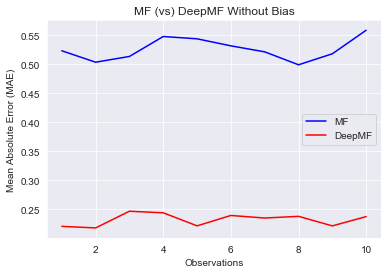

In [11]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x,MAE_normalMF,color="b",label='MF')
plt.plot(x,MAE_DeepMF,color="r",label='DeepMF')
plt.title("MF (vs) DeepMF Without Bias")
plt.xlabel("Observations")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.show()